In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
from scipy import fftpack
import datetime

In [2]:
daily_data = pd.read_csv(r'C:\Users\admin\Documents\Algo Asylum\Precipitation_Analysis\Precipitation data(csv)\preci_daily.csv')
daily_data.head()
data01 = daily_data.loc[(daily_data['date'].between('2001-01-01', '2001-12-31', inclusive=True))]

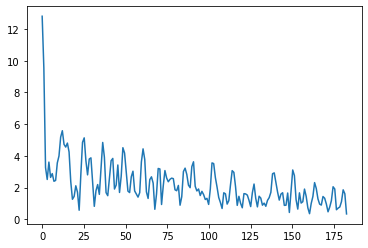

In [3]:
N = data01.shape[0]
sr = 1
y = np.array(data01['value'])
T = 1.0 / N
x = np.linspace(0.0, N*T, N)
#y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

In [4]:
freq = np.fft.fftfreq(N)
tp = 1/freq
tp

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


array([          inf,  365.        ,  182.5       ,  121.66666667,
         91.25      ,   73.        ,   60.83333333,   52.14285714,
         45.625     ,   40.55555556,   36.5       ,   33.18181818,
         30.41666667,   28.07692308,   26.07142857,   24.33333333,
         22.8125    ,   21.47058824,   20.27777778,   19.21052632,
         18.25      ,   17.38095238,   16.59090909,   15.86956522,
         15.20833333,   14.6       ,   14.03846154,   13.51851852,
         13.03571429,   12.5862069 ,   12.16666667,   11.77419355,
         11.40625   ,   11.06060606,   10.73529412,   10.42857143,
         10.13888889,    9.86486486,    9.60526316,    9.35897436,
          9.125     ,    8.90243902,    8.69047619,    8.48837209,
          8.29545455,    8.11111111,    7.93478261,    7.76595745,
          7.60416667,    7.44897959,    7.3       ,    7.15686275,
          7.01923077,    6.88679245,    6.75925926,    6.63636364,
          6.51785714,    6.40350877,    6.29310345,    6.18644

In [5]:
ampli = 2.0/N * np.abs(yf[:N//2])

In [6]:
ampli_tp = pd.DataFrame(zip(2.0/N * np.abs(yf[:N//2]), tp),columns=['Ampli', 'Time period'])
ampli_tp

,Ampli,Time period
0,12.814013,inf
1,9.547197,365.000000
2,3.262728,182.500000
3,2.508010,121.666667
4,3.605442,91.250000
...,...,...
177,0.770702,2.062147
178,1.110596,2.050562
179,1.853265,2.039106
180,1.603199,2.027778


In [7]:
sorted_data = ampli_tp.sort_values(by='Ampli', ascending=False)
sorted_data.drop([0], inplace = True) 
sorted_data = sorted_data.iloc[0:50]

(0.0, 50.0)

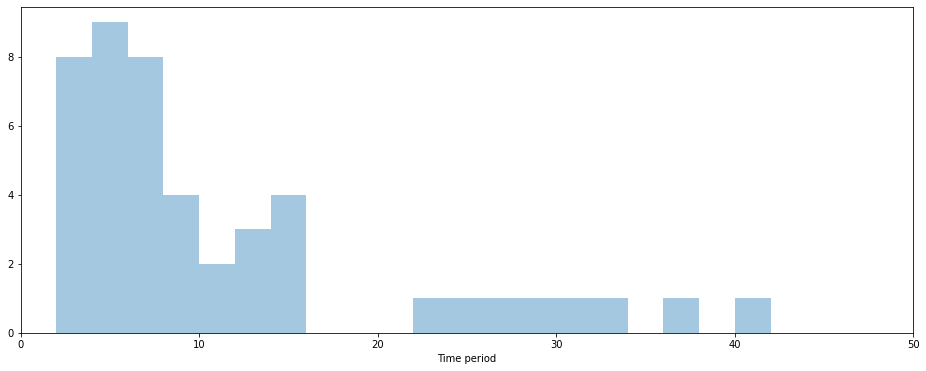

In [8]:
plt.figure(figsize=(16, 6))
k = []
for i in range(0, 750, 2):
    k.append(i)
sns.distplot(sorted_data['Time period'], bins = k, kde = False)
plt.xlim(0,50)

(0.0, 50.0)

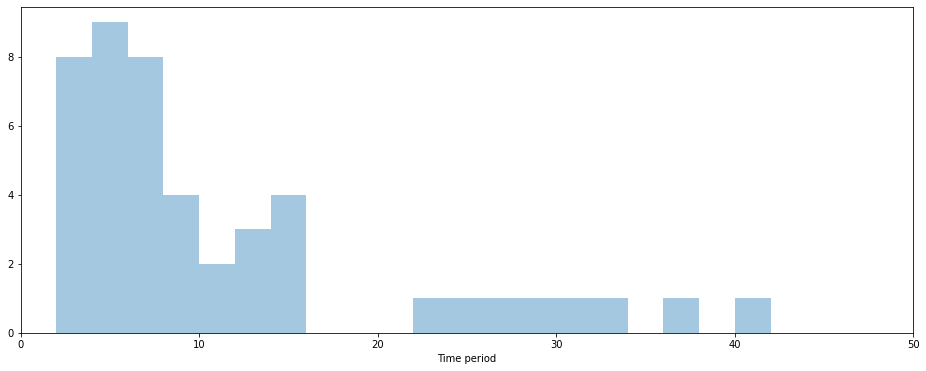

In [9]:
sorted_data = sorted_data.iloc[0:50]
plt.figure(figsize=(16, 6))
k = []
for i in range(0, 750, 2):
    k.append(i)
sns.distplot(sorted_data['Time period'], bins = k, kde = False)
plt.xlim(0,50)